In [1]:
import re
import numpy as np
import pandas as pd
from pprint import pprint
import random

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)
 
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

C:\Users\Sumin Seo\AppData\Roaming\Python\Python36\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
c:\python\lib\importlib\_bootstrap.py:219: RuntimeWarning: cymem.cymem.Pool size changed, may indicate binary incompatibility. Expected 48 from C header, got 64 from PyObject
  return f(*args, **kwds)
c:\python\lib\importlib\_bootstrap.py:219: RuntimeWarning: cymem.cymem.Address size changed, may indicate binary incompatibility. Expected 24 from C header, got 40 from PyObject
  return f(*args, **kwds)


In [100]:
df = pd.read_pickle("clean_train_abstract")

In [101]:
df = df.drop(columns='raw_abstract')

In [102]:
df.head()

,ISSN,date,topic,title,clean_train_abstract
0,1545-5963,2018/05,IEEE/ACM Transactions on Computational Biology...,Simulating the Large-Scale Erosion of Genomic ...,dramat decreas cost dna sequenc trigger millio...
1,1545-5963,2018/05,IEEE/ACM Transactions on Computational Biology...,Protecting Privacy and Security of Genomic Dat...,use patient health record provid tremend benef...
2,1545-5963,2018/05,IEEE/ACM Transactions on Computational Biology...,Implementation and Evaluation of an Algorithm ...,improv qualiti cryptograph privaci preserv gen...
3,1545-5963,2018/05,IEEE/ACM Transactions on Computational Biology...,Identification and Analysis of Key Residues in...,protein rna complex play import role various b...
4,1545-5963,2018/05,IEEE/ACM Transactions on Computational Biology...,Unified Deep Learning Architecture for Modelin...,predict spatial structur function biolog macro...


In [23]:
criterion = df['date'].map(lambda x: x.startswith(str(2016)))
df = df[criterion]
df.head()

,ISSN,date,topic,title,clean_train_abstract
304,1545-5963,2016/06,IEEE/ACM Transactions on Computational Biology...,A New Approach for Feature Selection from Micr...,mutual inform mi power concept correl centric ...
305,1545-5963,2016/06,IEEE/ACM Transactions on Computational Biology...,Enhancing the Prediction of Transmembrane β-Ba...,transmembran barrel tmbs one import class memb...
306,1545-5963,2016/06,IEEE/ACM Transactions on Computational Biology...,Identifying Disease Associated miRNAs Based on...,microrna mirna class small endogen non code ge...
307,1545-5963,2016/06,IEEE/ACM Transactions on Computational Biology...,Network-Based Method for Inferring Cancer Prog...,larg scale cancer genom project provid wealth ...
308,1545-5963,2016/06,IEEE/ACM Transactions on Computational Biology...,An Extensive Empirical Comparison of Probabili...,studi comprehens evalu perform five type proba...


In [24]:
sample = df.iloc[random.sample(range(0, len(df)), 100)]

In [25]:
sample.index = range(len(sample.index))
sample.head()

,ISSN,date,topic,title,clean_train_abstract
0,0162-8828,2016/11,IEEE Transactions on Pattern Analysis & Machin...,Go-ICP: A Globally Optimal Solution to 3D ICP ...,iter closest point icp algorithm one wide use ...
1,1045-9219,2016/01,IEEE Transactions on Parallel & Distributed Sy...,A Secure Anti-Collusion Data Sharing Scheme fo...,benefit cloud comput user achiev effect econom...
2,1045-9219,2016/07,IEEE Transactions on Parallel & Distributed Sy...,Cloud Customer's Historical Record Based Resou...,media content digit form rapid scale result po...
3,1063-8210,2016/12,IEEE Transactions on Very Large Scale Integrat...,Energy-Efficient Adaptive Hardware Accelerator...,text mine grow field applic enabl analysi larg...
4,1045-9219,2016/06,IEEE Transactions on Parallel & Distributed Sy...,Graphine: Programming Graph-Parallel Computati...,graph parallel comput becom crucial compon eme...


In [26]:
indexes = []
for x in range(0,len(sample)):
    if(len(sample['clean_train_abstract'][x])<100):
        indexes.append(x)

In [27]:
sample = sample.drop(indexes)
sample.index = range(len(sample.index))

In [28]:
sample.head()
sample.shape

(99, 5)

In [29]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True)) # deacc=True removes punctuations
 
data_words = list(sent_to_words(sample['clean_train_abstract']))
print(data_words[:1])

[['iter', 'closest', 'point', 'icp', 'algorithm', 'one', 'wide', 'use', 'method', 'point', 'set', 'registr', 'howev', 'base', 'local', 'iter', 'optim', 'icp', 'known', 'suscept', 'local', 'minima', 'perform', 'critic', 'reli', 'qualiti', 'initi', 'local', 'optim', 'guarante', 'paper', 'present', 'first', 'global', 'optim', 'algorithm', 'name', 'go', 'icp', 'euclidean', 'rigid', 'registr', 'two', 'point', 'set', 'error', 'metric', 'defin', 'icp', 'go', 'icp', 'method', 'base', 'branch', 'bound', 'scheme', 'search', 'entir', 'motion', 'space', 'se', 'exploit', 'special', 'structur', 'se', 'geometri', 'deriv', 'novel', 'upper', 'lower', 'bound', 'registr', 'error', 'function', 'local', 'icp', 'integr', 'bnb', 'scheme', 'speed', 'new', 'method', 'guarante', 'global', 'optim', 'also', 'discuss', 'extens', 'address', 'issu', 'outlier', 'robust', 'evalu', 'demonstr', 'propos', 'method', 'abl', 'produc', 'reliabl', 'registr', 'result', 'regardless', 'initi', 'go', 'icp', 'appli', 'scenario', '

In [30]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)
 
# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)
 
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

data_words_bigrams = make_bigrams(data_words)

#바이어그램 적용 결과 예시
print(data_words[0][:10])
print(data_words_bigrams[0][:10])

C:\Users\Sumin Seo\AppData\Roaming\Python\Python36\site-packages\gensim\models\phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


['iter', 'closest', 'point', 'icp', 'algorithm', 'one', 'wide', 'use', 'method', 'point']
['iter', 'closest', 'point', 'icp', 'algorithm', 'one', 'wide', 'use', 'method', 'point']


In [31]:
#토픽 모델링 적용을 위해 숫자로 바꿈
#단어를 숫자에 대응시켜 dictionary 만듦
id2word = corpora.Dictionary(data_words_bigrams)

# Create Corpus
texts = data_words_bigrams
corpus = [id2word.doc2bow(text) for text in texts]

[(id2word[id], freq) for id, freq in corpus[0]][:5]

[('abl', 1), ('address', 1), ('algorithm', 2), ('also', 1), ('alway', 1)]

In [32]:
#abstract 전체를 대상으로 lda_model 만들기
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
id2word=id2word,
num_topics=22,
random_state=100,
update_every=1,
chunksize=100,
passes=10,
alpha='auto',
per_word_topics=True)

In [91]:
probTable = pd.DataFrame([word[1] for word in lda_model.get_topic_terms(idx)] for idx in range(22))   # idx = topicid
topicTable_prob = pd.DataFrame([(id2word[word[0]],word[1]) for word in lda_model.get_topic_terms(idx)] for idx in range(22))

In [92]:
probTable

,0,1,2,3,4,5,6,7,8,9
0,0.037153,0.022362,0.022359,0.018655,0.014950,0.014943,0.011364,0.011253,0.011245,0.011244
1,0.016331,0.014294,0.013156,0.011525,0.011440,0.011275,0.009790,0.009446,0.008292,0.008249
2,0.033608,0.027479,0.018393,0.018376,0.015387,0.015337,0.012287,0.009301,0.009278,0.009265
3,0.012773,0.012365,0.012250,0.011241,0.011120,0.010134,0.010103,0.009524,0.009455,0.009153
4,0.017954,0.015701,0.013529,0.013525,0.013501,0.013457,0.013016,0.011310,0.010783,0.009009
5,0.020429,0.018737,0.016250,0.011279,0.011246,0.010764,0.010054,0.010000,0.009939,0.009364
6,0.017118,0.012965,0.011176,0.010831,0.010530,0.009066,0.008568,0.008515,0.007852,0.007839
7,0.030501,0.016292,0.014559,0.010840,0.010633,0.010625,0.010597,0.010391,0.009901,0.009275
8,0.019959,0.015831,0.011625,0.011602,0.010563,0.009519,0.009423,0.008887,0.008413,0.007916
9,0.032170,0.025713,0.019359,0.019355,0.019336,0.013063,0.013036,0.013026,0.013005,0.013001


In [97]:
trans_prob_table = probTable.T

In [98]:
# select numeric columns and calculate the sums
sums = trans_prob_table.select_dtypes(pd.np.number).sum().rename('total')
print(sums)

# append sums to the data frame
trans_prob_table.append(sums)

0     0.175530
1     0.113800
2     0.168711
3     0.108120
4     0.131785
5     0.128062
6     0.104460
7     0.133613
8     0.113737
9     0.181064
10    0.107337
11    0.146614
12    0.099330
13    0.129468
14    0.156256
15    0.227292
16    0.129766
17    0.127034
18    0.129647
19    0.115011
20    0.150846
21    0.120119
Name: total, dtype: float64


,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.037153,0.016331,0.033608,0.012773,0.017954,0.020429,0.017118,0.030501,0.019959,0.032170,...,0.011598,0.016014,0.022277,0.039152,0.022048,0.020246,0.020418,0.017980,0.041181,0.016008
1,0.022362,0.014294,0.027479,0.012365,0.015701,0.018737,0.012965,0.016292,0.015831,0.025713,...,0.011597,0.014654,0.017820,0.039125,0.016294,0.015249,0.013641,0.017970,0.018458,0.014654
2,0.022359,0.013156,0.018393,0.012250,0.013529,0.016250,0.011176,0.014559,0.011625,0.019359,...,0.010330,0.014562,0.017499,0.028467,0.015166,0.014996,0.013639,0.012417,0.016315,0.012993
3,0.018655,0.011525,0.018376,0.011241,0.013525,0.011279,0.010831,0.010840,0.011602,0.019355,...,0.010328,0.013901,0.015614,0.021391,0.011911,0.012685,0.013618,0.011057,0.011855,0.012671
4,0.014950,0.011440,0.015387,0.011120,0.013501,0.011246,0.010530,0.010633,0.010563,0.019336,...,0.010291,0.011751,0.015516,0.021378,0.011878,0.012683,0.013615,0.010992,0.011765,0.010650
5,0.014943,0.011275,0.015337,0.010134,0.013457,0.010764,0.009066,0.010625,0.009519,0.013063,...,0.009046,0.011750,0.013608,0.017867,0.011874,0.010353,0.013612,0.009904,0.010392,0.010650
6,0.011364,0.009790,0.012287,0.010103,0.013016,0.010054,0.008568,0.010597,0.009423,0.013036,...,0.009040,0.011743,0.013598,0.017834,0.010217,0.010253,0.011388,0.009689,0.010377,0.010644
7,0.011253,0.009446,0.009301,0.009524,0.011310,0.010000,0.008515,0.010391,0.008887,0.013026,...,0.009036,0.011719,0.013472,0.014300,0.010196,0.010197,0.011387,0.008492,0.010374,0.010644
8,0.011245,0.008292,0.009278,0.009455,0.010783,0.009939,0.007852,0.009901,0.008413,0.013005,...,0.009033,0.011708,0.013463,0.014291,0.010140,0.010194,0.009181,0.008345,0.010148,0.010617
9,0.011244,0.008249,0.009265,0.009153,0.009009,0.009364,0.007839,0.009275,0.007916,0.013001,...,0.009031,0.011667,0.013389,0.013487,0.010043,0.010177,0.009148,0.008164,0.009980,0.010588


In [34]:
topicTable_prob

,0,1,2,3,4,5,6,7,8,9
0,"(timelin, 0.024671657)","(reliabl, 0.017357325)","(slas, 0.017151337)","(oio, 0.01472955)","(ssds, 0.014699631)","(author, 0.012394395)","(document, 0.012394102)","(algorithm, 0.009983856)","(circuit, 0.009967822)","(timelinecur, 0.009932873)"
1,"(propos, 0.02462461)","(method, 0.022239346)","(page, 0.015288277)","(imag, 0.0137719195)","(use, 0.0126575995)","(mobil, 0.012598482)","(analysi, 0.011186229)","(featur, 0.011121686)","(space, 0.009906479)","(memori, 0.009855666)"
2,"(servic, 0.0478526)","(task, 0.04063025)","(cost, 0.025867842)","(rent, 0.022206571)","(heurist, 0.018543433)","(propos, 0.015975092)","(map, 0.014872433)","(mode, 0.014856262)","(base, 0.01165226)","(workflow, 0.011206914)"
3,"(secur, 0.013182159)","(system, 0.011089402)","(network, 0.010992621)","(technolog, 0.010567747)","(user, 0.010010456)","(set, 0.009979857)","(cmos, 0.009318388)","(scale, 0.008604567)","(achiev, 0.008441784)","(barcod, 0.00839178)"
4,"(membran_protein, 0.016384235)","(type, 0.012329711)","(problem, 0.010308251)","(mem, 0.010286948)","(function, 0.010285094)","(men, 0.010280274)","(relay, 0.010277048)","(placement, 0.010266353)","(network, 0.008409654)","(term, 0.008330646)"
5,"(data, 0.011454649)","(system, 0.01045874)","(mobil, 0.010053689)","(wifi, 0.00931692)","(graph, 0.009310977)","(power, 0.00898004)","(distribut, 0.00822952)","(algorithm, 0.0072503244)","(sourc, 0.007121048)","(gps, 0.0070946594)"
6,"(perform, 0.014535067)","(memori, 0.011781001)","(data, 0.011551154)","(process, 0.010927883)","(propos, 0.0103386985)","(use, 0.010313194)","(decod, 0.009310871)","(improv, 0.00909382)","(time, 0.0083374875)","(effici, 0.00799154)"
7,"(lifetim, 0.02960743)","(rout, 0.02959118)","(channel, 0.028876143)","(algorithm, 0.022381278)","(optim, 0.015155783)","(improv, 0.013479589)","(perform, 0.011934393)","(pf, 0.01144676)","(associ, 0.011420233)","(base, 0.00941322)"
8,"(network, 0.026246952)","(backup, 0.014454005)","(approach, 0.010570436)","(user, 0.010561826)","(data, 0.009294746)","(kernel, 0.0092561105)","(offset, 0.009239787)","(cell, 0.00923916)","(dynam, 0.008888616)","(paper, 0.008106911)"
9,"(approxim, 0.03411719)","(design, 0.018230382)","(mpeg, 0.017836217)","(video, 0.017762119)","(architectur, 0.017748117)","(base, 0.017109942)","(strategi, 0.015077583)","(encod, 0.013302478)","(propos, 0.0132914195)","(test, 0.01205994)"


# 연도별로 그래프

In [112]:
df_year = []
for i in range(5):
    criterion = df['date'].map(lambda x: x.startswith(str(2010+i)))
    df_tmp = df[criterion]
    print(df.head(3))
    df_year.append(df_tmp)

        ISSN     date                                              topic  \
0  1545-5963  2018/05  IEEE/ACM Transactions on Computational Biology...   
1  1545-5963  2018/05  IEEE/ACM Transactions on Computational Biology...   
2  1545-5963  2018/05  IEEE/ACM Transactions on Computational Biology...   

                                               title  \
0  Simulating the Large-Scale Erosion of Genomic ...   
1  Protecting Privacy and Security of Genomic Dat...   
2  Implementation and Evaluation of an Algorithm ...   

                                clean_train_abstract  
0  dramat decreas cost dna sequenc trigger millio...  
1  use patient health record provid tremend benef...  
2  improv qualiti cryptograph privaci preserv gen...  
        ISSN     date                                              topic  \
0  1545-5963  2018/05  IEEE/ACM Transactions on Computational Biology...   
1  1545-5963  2018/05  IEEE/ACM Transactions on Computational Biology...   
2  1545-5963  2018/05 

In [113]:
total_sums = []
def find_year_sums(df):
    data_words = list(sent_to_words(df['clean_train_abstract']))
    print(data_words[:1])

    # Build the bigram and trigram models
    bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
    trigram = gensim.models.Phrases(bigram[data_words], threshold=100)

    # Faster way to get a sentence clubbed as a trigram/bigram
    bigram_mod = gensim.models.phrases.Phraser(bigram)
    trigram_mod = gensim.models.phrases.Phraser(trigram)

    data_words_bigrams = make_bigrams(data_words)

    #바이어그램 적용 결과 예시
    print(data_words[0][:10])
    print(data_words_bigrams[0][:10])

    #토픽 모델링 적용을 위해 숫자로 바꿈
    #단어를 숫자에 대응시켜 dictionary 만듦
    id2word = corpora.Dictionary(data_words_bigrams)

    # Create Corpus
    texts = data_words_bigrams
    corpus = [id2word.doc2bow(text) for text in texts]

    [(id2word[id], freq) for id, freq in corpus[0]][:5]

    #abstract 전체를 대상으로 lda_model 만들기
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
    id2word=id2word,
    num_topics=22,
    random_state=100,
    update_every=1,
    chunksize=100,
    passes=10,
    alpha='auto',
    per_word_topics=True)

    probTable = pd.DataFrame([word[1] for word in lda_model.get_topic_terms(idx)] for idx in range(22))   # idx = topicid
    trans_prob_table = probTable.T

    # select numeric columns and calculate the sums
    sums = trans_prob_table.select_dtypes(pd.np.number).sum().rename('total')
    print(sums)

    # append sums to the data frame
    trans_prob_table.append(sums)
    total_sums.append(sums)

In [114]:
for i in range(5):
    print("Find "+str(i+1)+"-th year topic probabilty")
    find_year_sums(df_year[i])

[['six', 'paper', 'special', 'section', 'cover', 'broad', 'rang', 'bioinformat', 'topic', 'rang', 'compar', 'genom', 'phylogenet', 'popul', 'genet', 'rna', 'structur', 'predict', 'analysi', 'protein', 'protein', 'interact', 'network']]


C:\Users\Sumin Seo\AppData\Roaming\Python\Python36\site-packages\gensim\models\phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


['six', 'paper', 'special', 'section', 'cover', 'broad', 'rang', 'bioinformat', 'topic', 'rang']
['six', 'paper', 'special', 'section', 'cover', 'broad', 'rang', 'bioinformat', 'topic', 'rang']
0     0.297052
1     0.275016
2     0.210777
3     0.268420
4     0.205585
5     0.150987
6     0.243361
7     0.276623
8     0.237950
9     0.300340
10    0.202405
11    0.220524
12    0.343594
13    0.344430
14    0.232953
15    0.220608
16    0.230599
17    0.332449
18    0.318992
19    0.192835
20    0.275456
21    0.191203
Name: total, dtype: float64
[['paper', 'present', 'novel', 'approach', 'fast', 'rigid', 'dock', 'protein', 'base', 'geometr', 'complementar', 'extract', 'molecular', 'surfac', 'set', 'local', 'surfac', 'patch', 'generat', 'base', 'local', 'surfac', 'curvatur', 'shape', 'complementar', 'pair', 'patch', 'calcul', 'use', 'effici', 'shape', 'descriptor', 'shape', 'impact', 'descriptor', 'key', 'properti', 'shape', 'impact', 'descriptor', 'rotat', 'invari', 'obviat', 'need', '

In [121]:
print(total_sums)
print(total_sums[0][1])

# 첫번째 토픽에 대한 5개년치 토픽 확률
first_sums = [total_sums[i][0] for i in range(5)]

[0     0.297052
1     0.275016
2     0.210777
3     0.268420
4     0.205585
5     0.150987
6     0.243361
7     0.276623
8     0.237950
9     0.300340
10    0.202405
11    0.220524
12    0.343594
13    0.344430
14    0.232953
15    0.220608
16    0.230599
17    0.332449
18    0.318992
19    0.192835
20    0.275456
21    0.191203
Name: total, dtype: float64, 0     0.291822
1     0.209949
2     0.296566
3     0.264868
4     0.236005
5     0.356989
6     0.248937
7     0.147115
8     0.322891
9     0.288672
10    0.279772
11    0.324126
12    0.232748
13    0.269745
14    0.232200
15    0.292424
16    0.276025
17    0.284559
18    0.245523
19    0.443099
20    0.223689
21    0.245157
Name: total, dtype: float64, 0     0.364917
1     0.325340
2     0.360185
3     0.265688
4     0.261924
5     0.309974
6     0.374327
7     0.329412
8     0.344186
9     0.290768
10    0.223218
11    0.270339
12    0.379679
13    0.345061
14    0.155235
15    0.252350
16    0.348159
17    0.503806
18    0.231

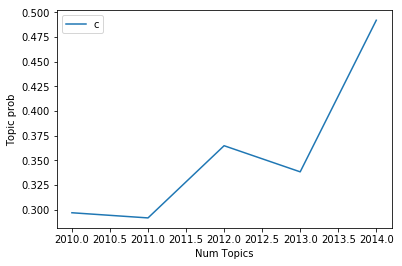

In [124]:
# Show graph
limit=2015; start=2010; step=1;
x = range(start, limit, step)
plt.plot(x, first_sums)
plt.xlabel("Num Topics")
plt.ylabel("Topic prob")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [35]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus)) # a measure of how good the model is. lower the better.
 
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words_bigrams, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.3308317728030445

Coherence Score:  0.35913218781407336


In [36]:
len(data_words)

99

In [19]:
import re
from nltk.util import ngrams

In [38]:
realTopics = sample.topic
realTopics = realTopics.drop_duplicates()
realTopics.index = range(len(realTopics.index))

In [39]:
realTopics.head()

0    IEEE Transactions on Pattern Analysis & Machin...
1    IEEE Transactions on Parallel & Distributed Sy...
2    IEEE Transactions on Very Large Scale Integrat...
3    IEEE Transactions on Dependable and Secure Com...
4                  IEEE/ACM Transactions on Networking
Name: topic, dtype: object

In [40]:
realTopics[0][realTopics[0].find(' on ')+4:]

'Pattern Analysis & Machine Intelligence'

In [41]:
realTopics = pd.DataFrame([realTopics[idx][realTopics[idx].find(' on ')+4:] for idx in range(0,len(realTopics))])

In [42]:
realTopics

,0
0,Pattern Analysis & Machine Intelligence
1,Parallel & Distributed Systems
2,Very Large Scale Integration (VLSI) Systems
3,Dependable and Secure Computing
4,Networking
5,Mobile Computing
6,Computers
7,Computational Biology and Bioinformatics
8,Software Engineering
9,Visualization & Computer Graphics


In [43]:
absTopicTable = pd.DataFrame(columns=[x for x in range(22)])
absTopicTable

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21


In [44]:
for idx in range(len(corpus)):
    if(idx%500==0):print(idx)
    for freq in lda_model.get_document_topics(corpus[idx]):
        absTopicTable.loc[idx,freq[0]] = freq[1]

0


In [45]:
absTopicTable.to_pickle('absTopicTable.p')

In [46]:
absTopicTable.head(20)

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,NaN,0.0174699,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.977656,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,0.769558,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.226842,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,0.611441,0.284673,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.100588,NaN
4,NaN,NaN,NaN,NaN,NaN,0.996128,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.995547,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,0.99562,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.993869,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.98822,NaN,NaN,NaN
9,NaN,NaN,0.0588656,NaN,NaN,NaN,NaN,NaN,NaN,0.640287,...,NaN,NaN,NaN,NaN,NaN,NaN,0.109159,NaN,0.188785,NaN


In [47]:
absTopicTable = absTopicTable.fillna(0)

In [48]:
absTopicTable.iloc[absTopicTable.idxmax(),:]

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
10,0.994288,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.99562,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
37,0.000000,0.00000,0.996284,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
78,0.000000,0.00000,0.000000,0.997191,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
34,0.000000,0.00000,0.000000,0.000000,0.995502,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
44,0.000000,0.00000,0.000000,0.000000,0.000000,0.996479,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
14,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.997357,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.995711,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
97,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.997049,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
12,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.990974,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [49]:
sample.loc[absTopicTable.idxmax(),'topic']

10                       IEEE Transactions on Computers
6                   IEEE/ACM Transactions on Networking
37              IEEE Transactions on Services Computing
78    IEEE Transactions on Emerging Topics in Computing
34    IEEE/ACM Transactions on Computational Biology...
44                  IEEE/ACM Transactions on Networking
14                       IEEE Transactions on Computers
25                       IEEE Transactions on Computers
97                IEEE Transactions on Mobile Computing
12                       IEEE Transactions on Computers
90    IEEE Transactions on Visualization & Computer ...
2     IEEE Transactions on Parallel & Distributed Sy...
59    IEEE Transactions on Knowledge & Data Engineering
92                  IEEE/ACM Transactions on Networking
69    IEEE Transactions on Very Large Scale Integrat...
48    IEEE Transactions on Very Large Scale Integrat...
22    IEEE Transactions on Very Large Scale Integrat...
57                  IEEE/ACM Transactions on Net

In [50]:
import networkx as nx
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'networkx'

In [51]:
from gensim.models import Word2Vec
embedding_model = Word2Vec(data_words, size=100, window = 2, min_count=50, workers=4, iter=100, sg=1)

In [52]:
topicTable.head()

,0,1,2,3,4,5,6,7,8,9
0,timelin,reliabl,slas,oio,ssds,author,document,algorithm,circuit,timelinecur
1,propos,method,page,imag,use,mobil,analysi,featur,space,memori
2,servic,task,cost,rent,heurist,propos,map,mode,base,workflow
3,secur,system,network,technolog,user,set,cmos,scale,achiev,barcod
4,membran_protein,type,problem,mem,function,men,relay,placement,network,term


In [53]:
# check embedding result
print(embedding_model.most_similar(positive=["data"], topn=10))

C:\Users\Sumin Seo\AppData\Roaming\Python\Python36\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('achiev', 0.9795185327529907), ('result', 0.9752610325813293), ('paper', 0.9699232578277588), ('problem', 0.967679500579834), ('propos', 0.9645878076553345), ('model', 0.9628164172172546), ('use', 0.9612152576446533), ('base', 0.9528347253799438), ('show', 0.9455586671829224), ('perform', 0.9395186901092529)]


# Improvement

In [148]:
def per_coh(lda_model, corpus, data_words_bigrams, id2word):    
    # Compute Perplexity
    per = lda_model.log_perplexity(corpus)
    print('\nPerplexity: ', per) # a measure of how good the model is. lower the better.
    
    # Compute Coherence Score
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words_bigrams, dictionary=id2word, coherence='c_v')
    coh = coherence_model_lda.get_coherence()
    print('\nCoherence Score: ', coh)
    
    return per,coh 

In [149]:
# update??
coherence_values = []
init_value = 15
for i in range(10):
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
    id2word=id2word,
    num_topics=i+init_value,
    random_state=100,
    update_every=1,
    chunksize=100,
    passes=10,
    alpha='auto',
    per_word_topics=True)
    
    print("num_topics  = "+str(i+15))
    per, coh = per_coh(lda_model, corpus, data_words_bigrams, id2word)
    print("------------------")

    coherence_values.append(coh)

num_topics  = 15

Perplexity:  -7.287314136000943

Coherence Score:  0.28394877186897927
------------------
num_topics  = 16

Perplexity:  -7.308533669333389


KeyboardInterrupt: 

In [78]:
coherence_values

[0.28394877186897927,
 0.2972149990409208,
 0.31165083992749654,
 0.3087616036735692,
 0.3448897235053655,
 0.3280154509171588,
 0.31648907936281945,
 0.35913218781407336,
 0.3601017340727888,
 0.3278550059339163]

range(15, 25)


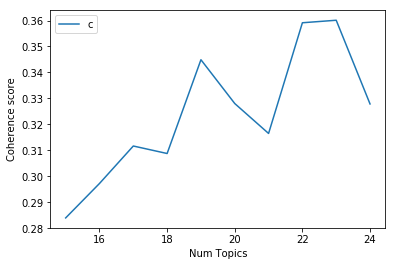

In [85]:
# Show graph
limit=25; start=15; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [86]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 15  has Coherence Value of 0.2839
Num Topics = 16  has Coherence Value of 0.2972
Num Topics = 17  has Coherence Value of 0.3117
Num Topics = 18  has Coherence Value of 0.3088
Num Topics = 19  has Coherence Value of 0.3449
Num Topics = 20  has Coherence Value of 0.328
Num Topics = 21  has Coherence Value of 0.3165
Num Topics = 22  has Coherence Value of 0.3591
Num Topics = 23  has Coherence Value of 0.3601
Num Topics = 24  has Coherence Value of 0.3279


# Ngram - Uni, Bi, Trigram

In [126]:
criterion = df['date'].map(lambda x: x.startswith(str(2016)))
df = df[criterion]
df.head()

,ISSN,date,topic,title,clean_train_abstract
304,1545-5963,2016/06,IEEE/ACM Transactions on Computational Biology...,A New Approach for Feature Selection from Micr...,mutual inform mi power concept correl centric ...
305,1545-5963,2016/06,IEEE/ACM Transactions on Computational Biology...,Enhancing the Prediction of Transmembrane β-Ba...,transmembran barrel tmbs one import class memb...
306,1545-5963,2016/06,IEEE/ACM Transactions on Computational Biology...,Identifying Disease Associated miRNAs Based on...,microrna mirna class small endogen non code ge...
307,1545-5963,2016/06,IEEE/ACM Transactions on Computational Biology...,Network-Based Method for Inferring Cancer Prog...,larg scale cancer genom project provid wealth ...
308,1545-5963,2016/06,IEEE/ACM Transactions on Computational Biology...,An Extensive Empirical Comparison of Probabili...,studi comprehens evalu perform five type proba...


In [130]:
# Build the bigram and trigram models
unigram = data_words
bigram_low = gensim.models.Phrases(data_words, min_count=5, threshold=20) # higher threshold fewer phrases.
trigram_low = gensim.models.Phrases(bigram[data_words], threshold=20)
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod_low = gensim.models.phrases.Phraser(bigram_low)
trigram_mod_low = gensim.models.phrases.Phraser(trigram_low)
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

grams = [unigram, bigram_mod_low, bigram_mod, trigram_mod_low, trigram_mod]

def make_grams(texts, mod):
    return [mod[doc] for doc in texts]

data_words_grams = [unigram]
for i in range(1,5):
    print(i)
    data_words_grams.append(make_grams(data_words, grams[i]))

1
2
3
4


In [151]:
total_sums = []  # 별로 필요 없음

def find_which_grams(df, data_words_bigrams):
    data_words = list(sent_to_words(df['clean_train_abstract']))
    #print(data_words[:1])

    #바이어그램 적용 결과 예시
    #print(data_words[0][:10])
    #print(data_words_bigrams[0][:2])

    #토픽 모델링 적용을 위해 숫자로 바꿈
    #단어를 숫자에 대응시켜 dictionary 만듦
    id2word = corpora.Dictionary(data_words_bigrams)

    # Create Corpus
    texts = data_words_bigrams
    corpus = [id2word.doc2bow(text) for text in texts]

    [(id2word[id], freq) for id, freq in corpus[0]][:5]
    
    '''
    #abstract 전체를 대상으로 lda_model 만들기
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
    id2word=id2word,
    num_topics=22,
    random_state=100,
    update_every=1,
    chunksize=100,
    passes=10,
    alpha='auto',
    per_word_topics=True)

    probTable = pd.DataFrame([word[1] for word in lda_model.get_topic_terms(idx)] for idx in range(22))   # idx = topicid
    trans_prob_table = probTable.T

    # select numeric columns and calculate the sums
    sums = trans_prob_table.select_dtypes(pd.np.number).sum().rename('total')
    print(sums)

    # append sums to the data frame
    trans_prob_table.append(sums)
    total_sums.append(sums)
    '''
    coherence_values = []
    init_value = 15  # topic num 15개부터 range 만큼 실험
    
    for i in range(10):
        lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
        id2word=id2word,
        num_topics=i + init_value,
        random_state=100,
        update_every=1,
        chunksize=100,
        passes=10,
        alpha='auto',
        per_word_topics=True)

        print("num_topics  = "+str(i+15))
        per, coh = per_coh(lda_model, corpus, data_words_bigrams, id2word)
        print("------------------")
        
        coherence_values.append(coh)
        
    # Show graph
    limit=25; start=15; step=1;
    x = range(start, limit, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Num Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()
    
    # Print the coherence scores
    for m, cv in zip(x, coherence_values):
        print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

0
num_topics  = 15

Perplexity:  -7.346739016103806

Coherence Score:  0.3417021578330966
------------------
num_topics  = 16

Perplexity:  -7.339902535917219

Coherence Score:  0.30762020577376525
------------------
num_topics  = 17

Perplexity:  -7.335379057958703

Coherence Score:  0.3454777249123956
------------------
num_topics  = 18

Perplexity:  -7.363092836654386

Coherence Score:  0.2978805725352827
------------------
num_topics  = 19

Perplexity:  -7.357896468559457

Coherence Score:  0.3246031132290553
------------------
num_topics  = 20

Perplexity:  -7.366867993207873

Coherence Score:  0.34940746199054934
------------------
num_topics  = 21

Perplexity:  -7.369742977675522

Coherence Score:  0.34131723458763547
------------------
num_topics  = 22

Perplexity:  -7.364619957924299

Coherence Score:  0.3279754026397953
------------------
num_topics  = 23

Perplexity:  -7.394465072312784

Coherence Score:  0.3262089981851675
------------------
num_topics  = 24

Perplexity:  -

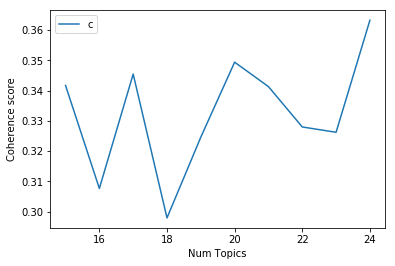

Num Topics = 15  has Coherence Value of 0.3417
Num Topics = 16  has Coherence Value of 0.3076
Num Topics = 17  has Coherence Value of 0.3455
Num Topics = 18  has Coherence Value of 0.2979
Num Topics = 19  has Coherence Value of 0.3246
Num Topics = 20  has Coherence Value of 0.3494
Num Topics = 21  has Coherence Value of 0.3413
Num Topics = 22  has Coherence Value of 0.328
Num Topics = 23  has Coherence Value of 0.3262
Num Topics = 24  has Coherence Value of 0.3633
1
num_topics  = 15

Perplexity:  -7.287314136000943

Coherence Score:  0.28394877186897927
------------------
num_topics  = 16

Perplexity:  -7.308533669333389

Coherence Score:  0.2972149990409208
------------------
num_topics  = 17

Perplexity:  -7.314430289832636

Coherence Score:  0.31165083992749654
------------------
num_topics  = 18

Perplexity:  -7.324416129408799

Coherence Score:  0.3087616036735692
------------------
num_topics  = 19

Perplexity:  -7.313563712831261

Coherence Score:  0.3448897235053655
-----------

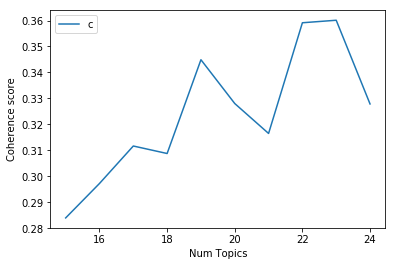

Num Topics = 15  has Coherence Value of 0.2839
Num Topics = 16  has Coherence Value of 0.2972
Num Topics = 17  has Coherence Value of 0.3117
Num Topics = 18  has Coherence Value of 0.3088
Num Topics = 19  has Coherence Value of 0.3449
Num Topics = 20  has Coherence Value of 0.328
Num Topics = 21  has Coherence Value of 0.3165
Num Topics = 22  has Coherence Value of 0.3591
Num Topics = 23  has Coherence Value of 0.3601
Num Topics = 24  has Coherence Value of 0.3279
2
num_topics  = 15

Perplexity:  -7.3449540130314395

Coherence Score:  0.3413569355772983
------------------
num_topics  = 16

Perplexity:  -7.337693924131312

Coherence Score:  0.3113901225544211
------------------
num_topics  = 17

Perplexity:  -7.331998795695571

Coherence Score:  0.3454513616528233
------------------
num_topics  = 18

Perplexity:  -7.362608163249339

Coherence Score:  0.3073076128473297
------------------
num_topics  = 19

Perplexity:  -7.362160764093563

Coherence Score:  0.3356018695433098
------------

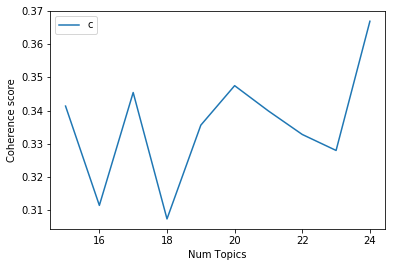

Num Topics = 15  has Coherence Value of 0.3414
Num Topics = 16  has Coherence Value of 0.3114
Num Topics = 17  has Coherence Value of 0.3455
Num Topics = 18  has Coherence Value of 0.3073
Num Topics = 19  has Coherence Value of 0.3356
Num Topics = 20  has Coherence Value of 0.3475
Num Topics = 21  has Coherence Value of 0.3399
Num Topics = 22  has Coherence Value of 0.3328
Num Topics = 23  has Coherence Value of 0.328
Num Topics = 24  has Coherence Value of 0.367
3
num_topics  = 15

Perplexity:  -7.2863990172977715

Coherence Score:  0.2828491622039628
------------------
num_topics  = 16

Perplexity:  -7.30343833470122

Coherence Score:  0.2978097735466627
------------------
num_topics  = 17

Perplexity:  -7.309716159502328

Coherence Score:  0.306953406695703
------------------
num_topics  = 18

Perplexity:  -7.322892184140169

Coherence Score:  0.31133090643655364
------------------
num_topics  = 19

Perplexity:  -7.308820620931505

Coherence Score:  0.3372053737456805
--------------

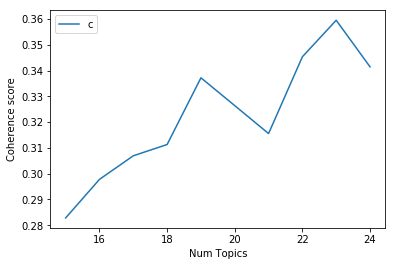

Num Topics = 15  has Coherence Value of 0.2828
Num Topics = 16  has Coherence Value of 0.2978
Num Topics = 17  has Coherence Value of 0.307
Num Topics = 18  has Coherence Value of 0.3113
Num Topics = 19  has Coherence Value of 0.3372
Num Topics = 20  has Coherence Value of 0.3264
Num Topics = 21  has Coherence Value of 0.3156
Num Topics = 22  has Coherence Value of 0.3454
Num Topics = 23  has Coherence Value of 0.3595
Num Topics = 24  has Coherence Value of 0.3415
4


IndexError: list index out of range

In [152]:
i=0
for item in data_words_grams:
    print (i)
    i+=1
    find_which_grams(df, data_words_grams[i])
    

num_topics  = 15

Perplexity:  -7.277907868564527

Coherence Score:  0.32308968666123933
------------------
num_topics  = 16

Perplexity:  -7.299440315390209

Coherence Score:  0.3256334687782132
------------------
num_topics  = 17

Perplexity:  -7.3084568755179005

Coherence Score:  0.3386602815777134
------------------
num_topics  = 18

Perplexity:  -7.287558077003759

Coherence Score:  0.333191167337676
------------------
num_topics  = 19

Perplexity:  -7.319320149468615

Coherence Score:  0.3005619686867648
------------------
num_topics  = 20

Perplexity:  -7.322000726295974

Coherence Score:  0.35630408515399614
------------------
num_topics  = 21

Perplexity:  -7.336485777969386

Coherence Score:  0.33004616903436385
------------------
num_topics  = 22

Perplexity:  -7.328190286474278

Coherence Score:  0.3558815906219236
------------------
num_topics  = 23

Perplexity:  -7.3388796297971615

Coherence Score:  0.35423241718797543
------------------
num_topics  = 24

Perplexity:  -

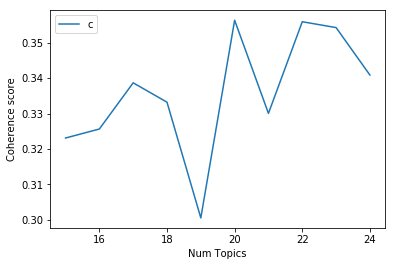

Num Topics = 15  has Coherence Value of 0.3231
Num Topics = 16  has Coherence Value of 0.3256
Num Topics = 17  has Coherence Value of 0.3387
Num Topics = 18  has Coherence Value of 0.3332
Num Topics = 19  has Coherence Value of 0.3006
Num Topics = 20  has Coherence Value of 0.3563
Num Topics = 21  has Coherence Value of 0.33
Num Topics = 22  has Coherence Value of 0.3559
Num Topics = 23  has Coherence Value of 0.3542
Num Topics = 24  has Coherence Value of 0.3409


In [153]:
find_which_grams(df, unigram)